In [381]:
# torch imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

In [382]:
#other library imports
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import gc
from time import perf_counter
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # otherwise plot kills the kernel 

In [383]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('The device used is :a {} device'.format(device))

The device used is :a cpu device


# NN Model definition

In [384]:
class UnivApproxNeuralNet(nn.Module):
   '''
   Class for Univ Approx. Extends nn.Module.
   ------------------
   Input Parameters -
   num_hidden_units - creates an 1 layer Neural net with no. of hidden units 
   '''
   def __init__(self, num_hidden_units =50):
      super(UnivApproxNeuralNet, self).__init__() # superconstructor
      self.num_hidden_units =num_hidden_units
    
      self.lin_layer = nn.Sequential(
      nn.Linear(1, self.num_hidden_units),
      nn.ReLU(),
      nn.Linear(self.num_hidden_units, 1)#,
      #nn.ReLU()
      )
   def forward(self, x):
     logits = self.lin_layer(x)
     return logits

### creating the test train X & Y

In [385]:
# Relationship between target y and input x : y = x^2
x = np.linspace(0,6,1000)#-3,3
y = np.sin(x) # broadcasting with np #np.array([math.sin(elem) for elem in x])


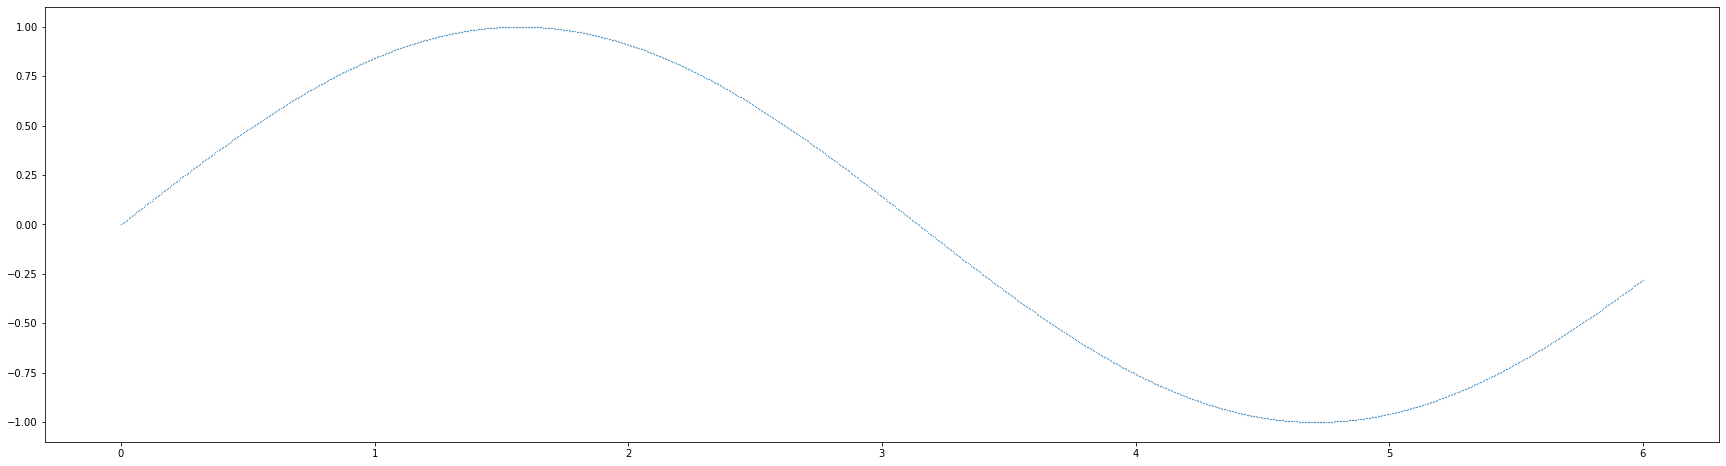

In [386]:
plt.rcParams["figure.figsize"] = (30,8)
plt.scatter(x,y,s=0.1)
plt.show()

In [387]:
# Convert the data to tensor format for PyTorch Univ Approx model
print(x.shape)
input_x = torch.tensor(x).view(-1,1) # reshape the data
print(input_x.shape)
target_y = torch.tensor(y).view(-1,1)

(1000,)
torch.Size([1000, 1])


# Training the Univ Approx NN

In [388]:
def train_Univ_approx( optimizer, model,criterion, epochs):

    for epoch in range( epochs):  # loop over the data multiple times
   
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs_y_pred = model(input_x.float())
        loss = criterion(outputs_y_pred, target_y.float())
        loss.backward()
        optimizer.step()
    print('loss :', loss.item())

In [389]:
def test_sine_data( model):

    with torch.no_grad():
        x_test = np.linspace(0,6,100)
        test_inputs = torch.tensor(x_test).view(-1,1).float()
        y_test_original = np.sin(x_test)
        y_test_hat = model(test_inputs)
        y_test_hat = y_test_hat.detach().numpy()
    plt.rcParams["figure.figsize"] = (30,10)
    numsides= 4 # sqaure
    angle = 0
    plt.scatter(x_test,y_test_original,label='original Function',s=300, facecolors='none', edgecolors='r', marker= (numsides, 0, angle))
    plt.scatter(x_test,y_test_hat,label="Predicted Function",s=50, c = 'blue', marker= "1")
    plt.title(f'no. of neurons in the hidden layer: {num_hidden_units}')
    plt.ylabel('Output Variable : y test ')
    plt.xlabel('Input Variable : X test')
    plt.legend()
    plt.show()

loss : 0.00027949712239205837
time taken is 17.6 seconds 


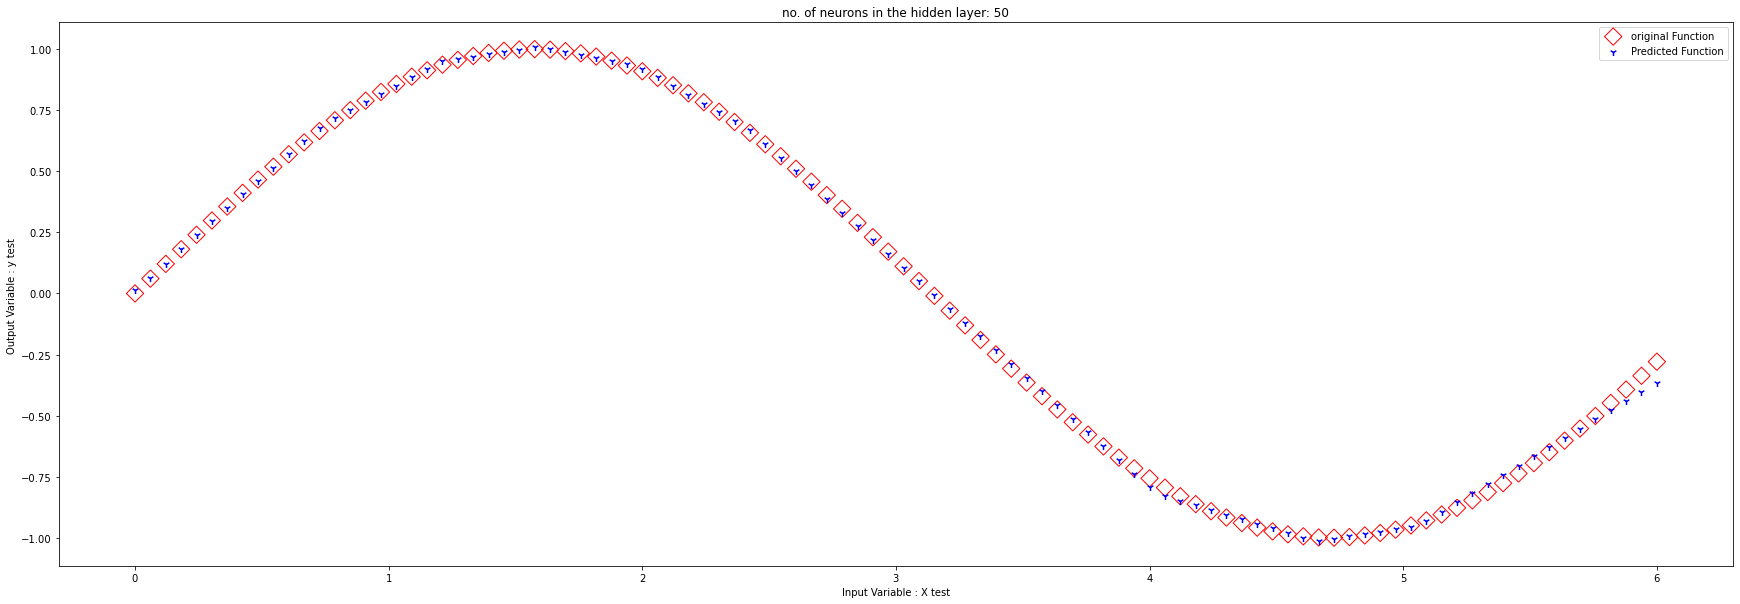

In [390]:
num_hidden_units =50
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx( optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

# 1.c trying different no of hidden units 

loss : 0.10308445245027542
time taken is 13.5 seconds 


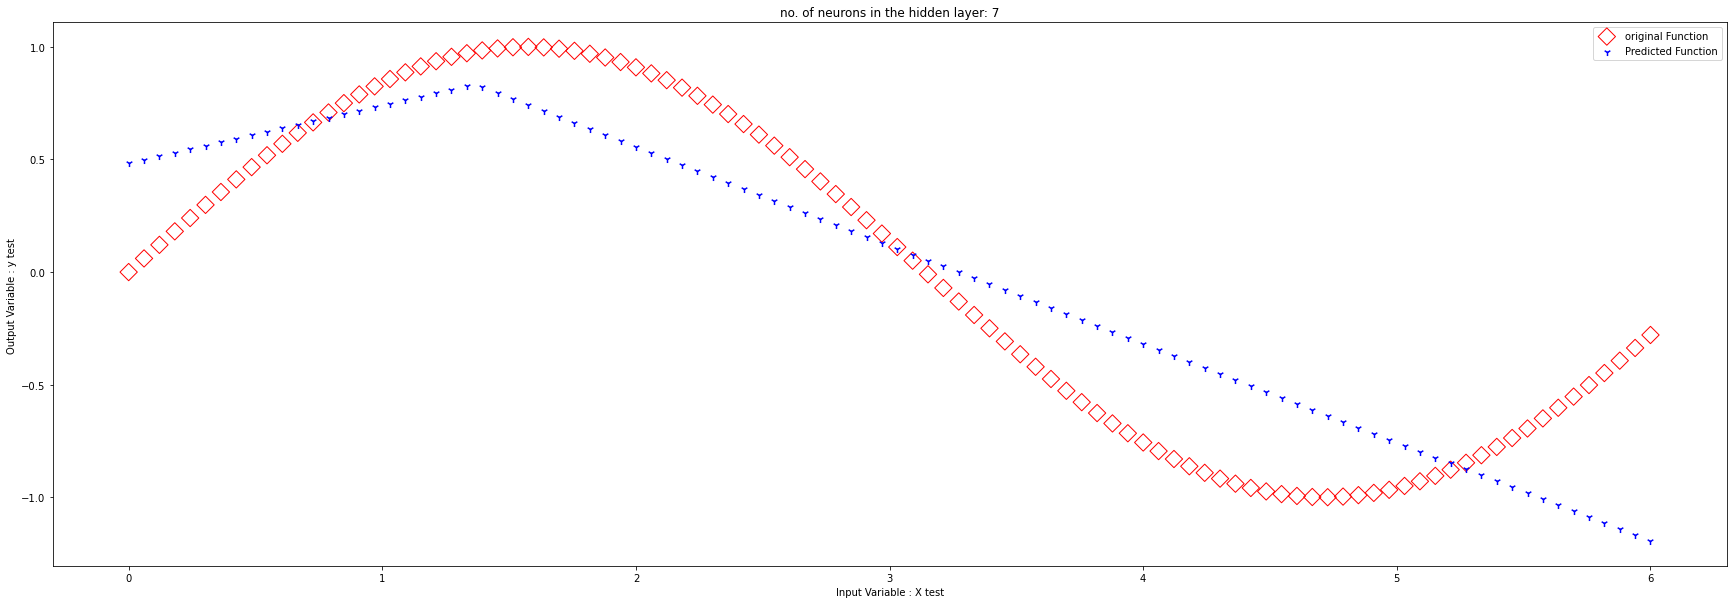

In [392]:
num_hidden_units =7
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx( optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

loss : 0.004195892717689276
time taken is 13.4 seconds 


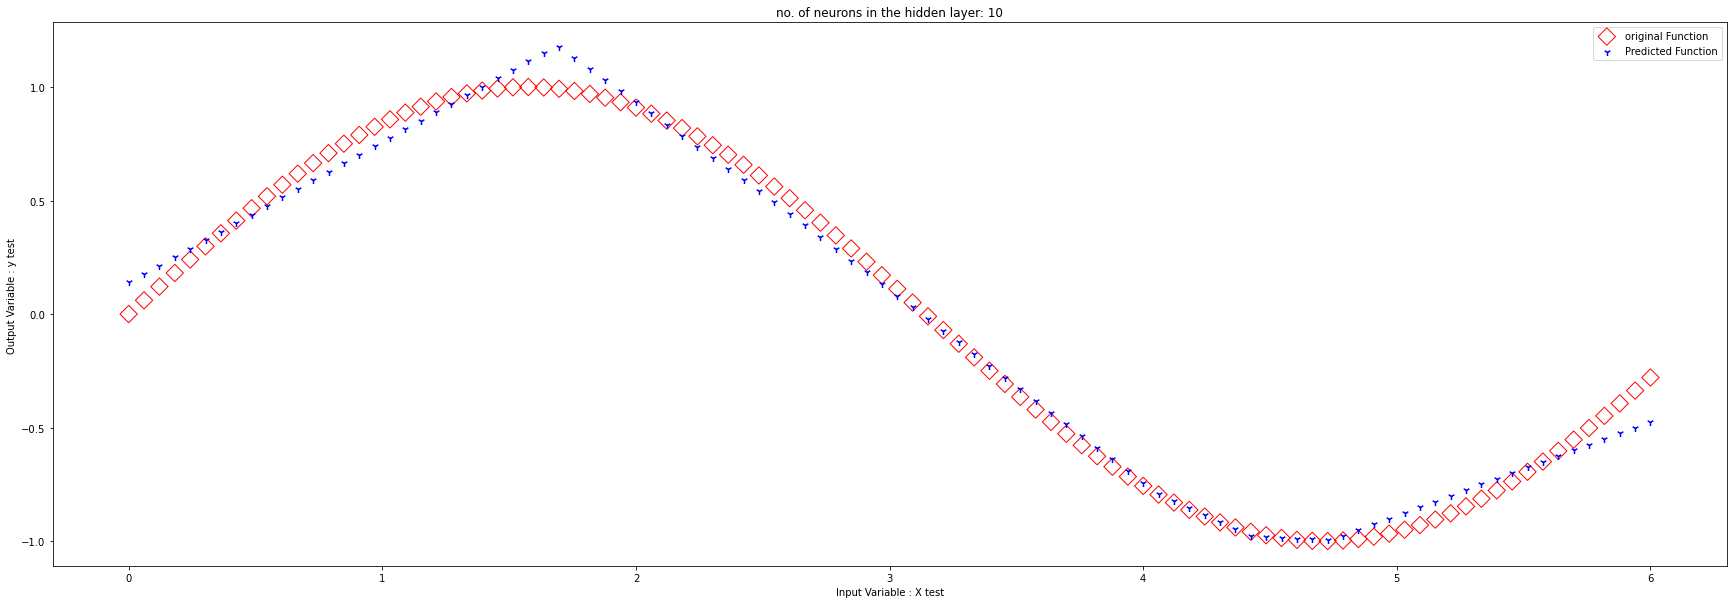

In [356]:
num_hidden_units =10
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(input_x,target_y,optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

loss : 0.012897712178528309
time taken is 14.9 seconds 


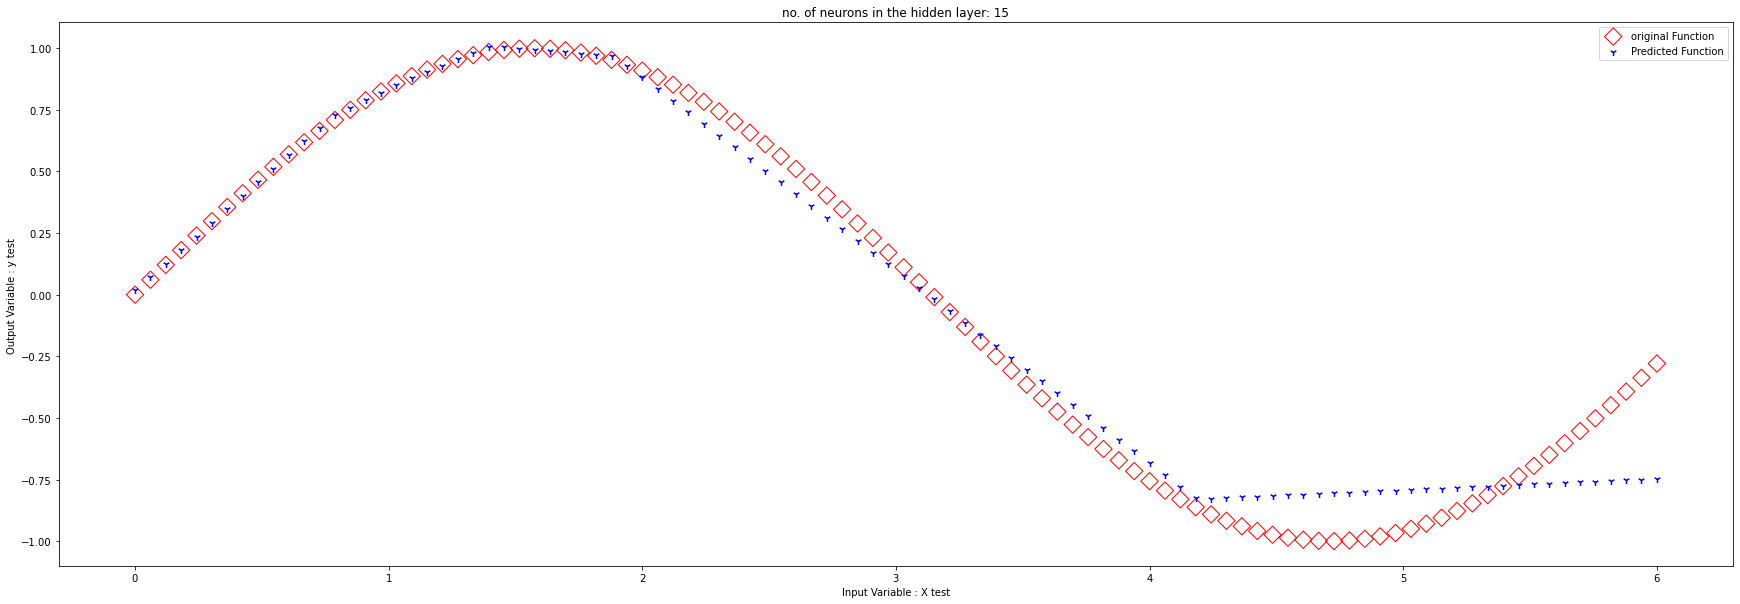

In [360]:
num_hidden_units =15
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(input_x,target_y,optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

loss : 0.00019128446001559496
time taken is 15.9 seconds 


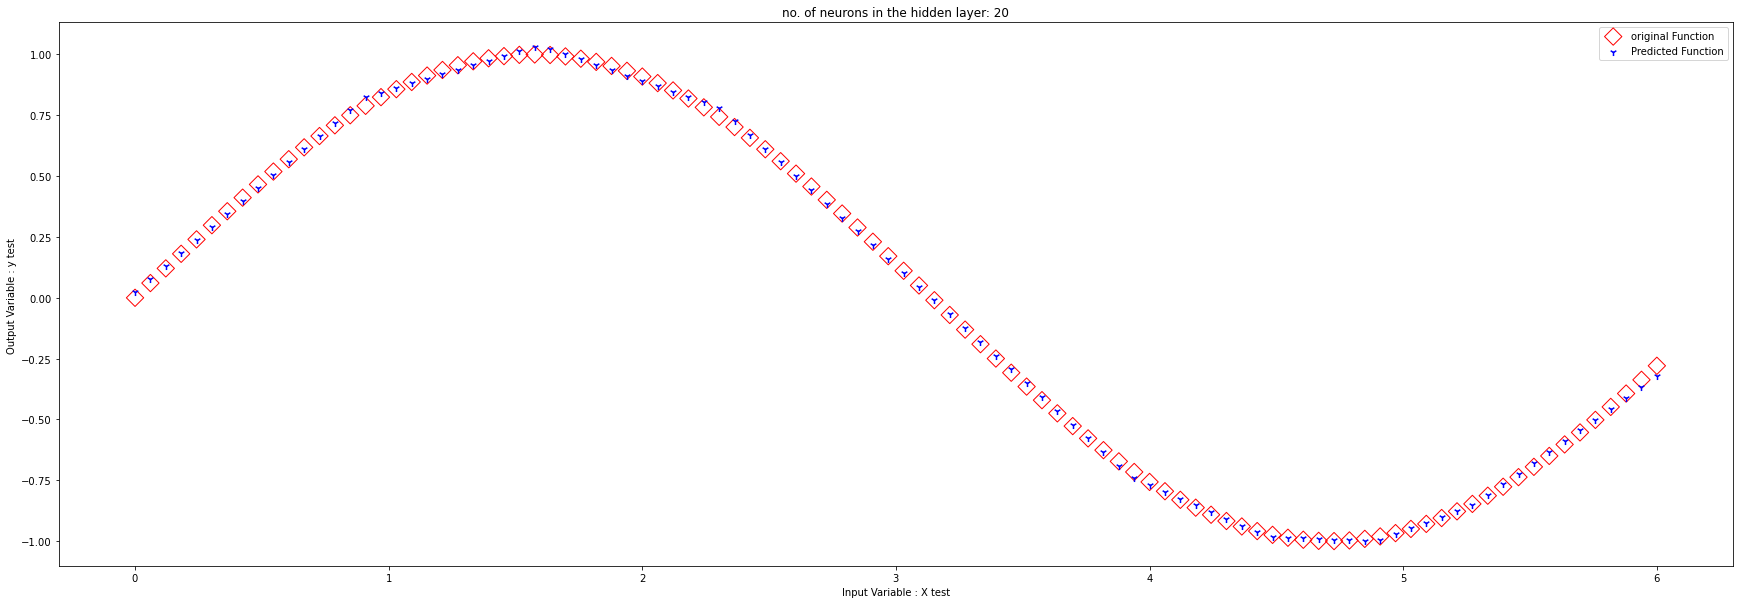

In [357]:
num_hidden_units =20
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

loss : 8.692928531672806e-05
time taken is 16.9 seconds 


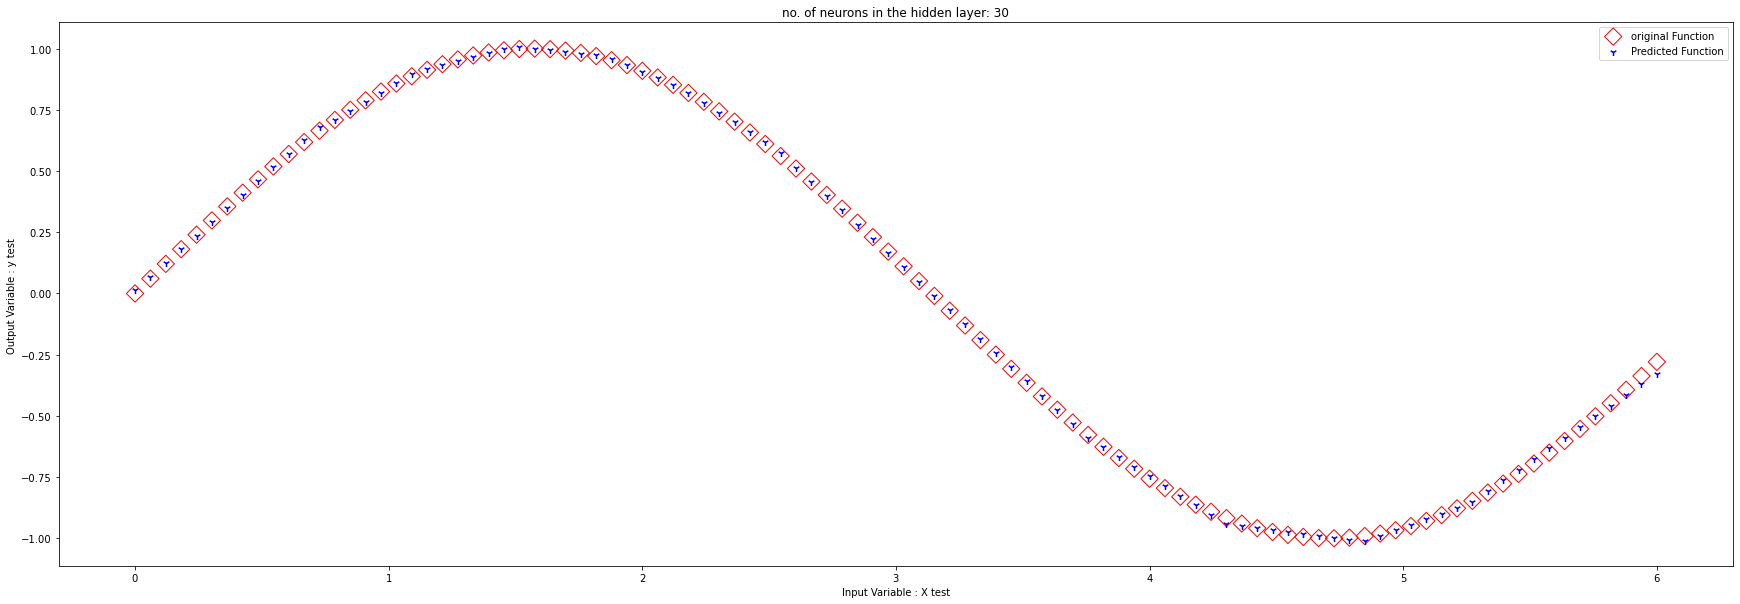

In [347]:
num_hidden_units =30
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

loss : 1.2953886653122026e-05
time taken is 22.6 seconds 


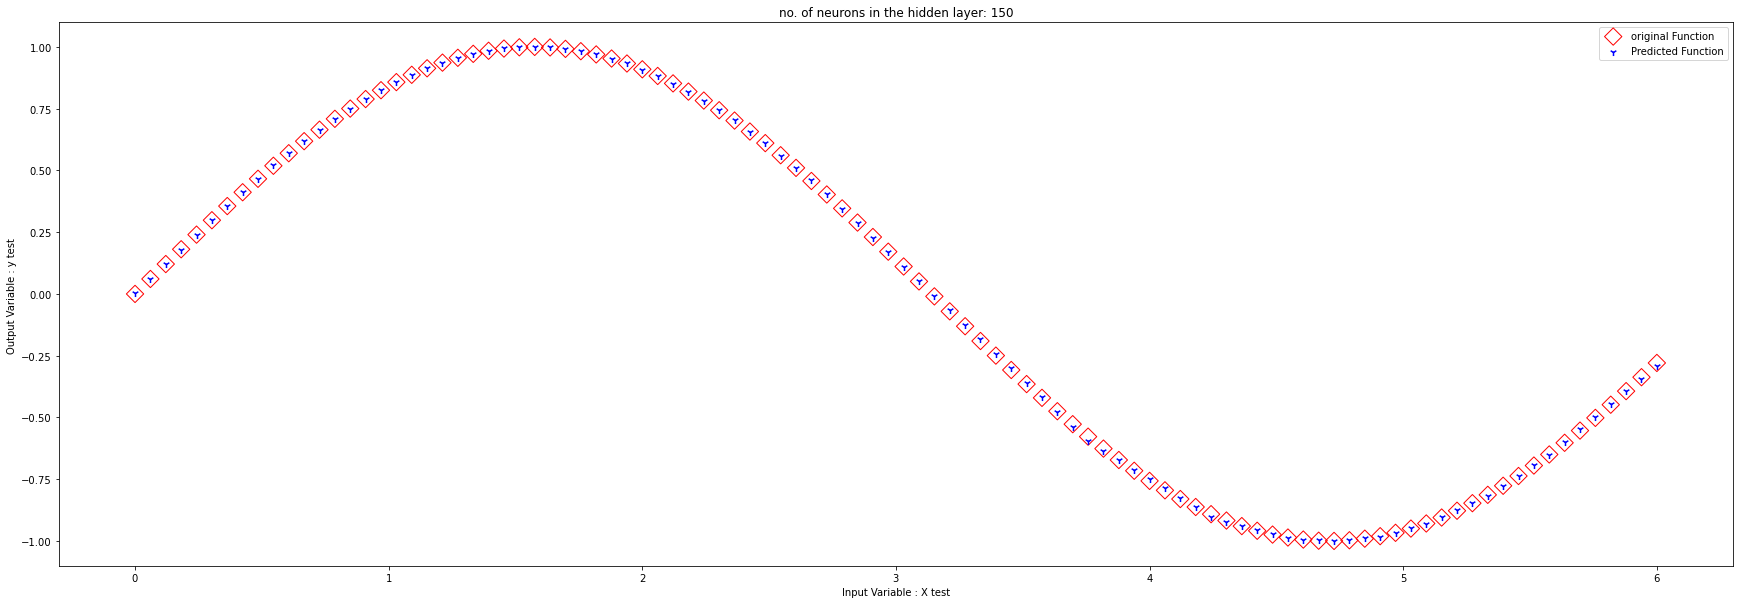

In [348]:
num_hidden_units =150
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

## OBSERVATION -- if we use too small number of neurons ( e.g. 10) the NN is not able to approximate the Sine wave 
## to a good precision. good approximation for 50 and beyond

 # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **
 
 # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **
 
  # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **

# 1.d. Sigmoid activation function

In [349]:
class UnivApproxNeuralNet_sigmoid(nn.Module):
   '''
   Class for Univ Approx. Extends nn.Module.
   ------------------
   Input Parameters -
   num_hidden_units - creates an 1 layer Neural net with no. of hidden units 
   '''
   def __init__(self, num_hidden_units =50):
      super(UnivApproxNeuralNet_sigmoid, self).__init__() # superconstructor
      self.num_hidden_units =num_hidden_units
    
      self.lin_layer = nn.Sequential(
      nn.Linear(1, self.num_hidden_units),
      nn.Sigmoid(),
      nn.Linear(self.num_hidden_units, 1)#,
      #nn.ReLU()
      )
   def forward(self, x):
     logits = self.lin_layer(x)
     return logits

In [350]:
num_hidden_units =50
model_sig = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)
print(model_sig)

UnivApproxNeuralNet_sigmoid(
  (lin_layer): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


loss : 0.0036204566713422537
time taken is 22.6 seconds 


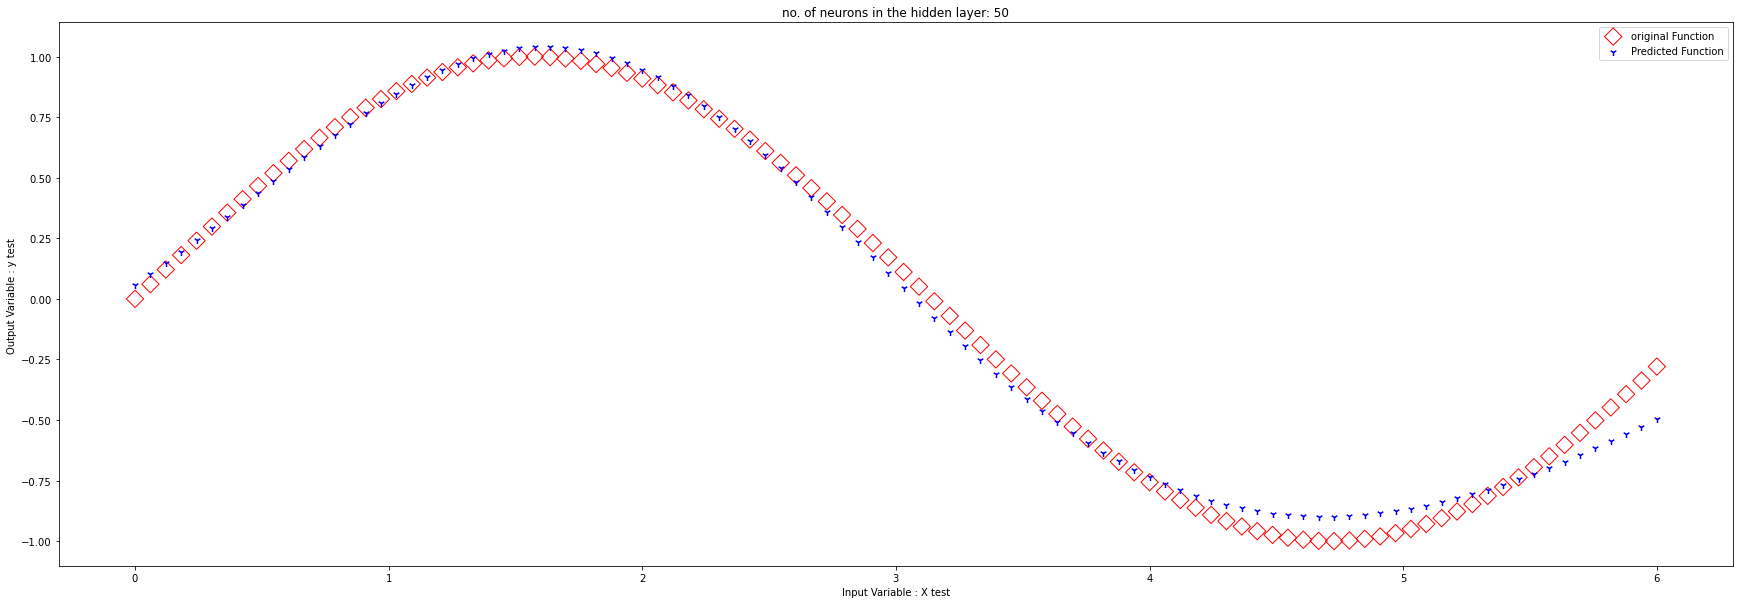

In [351]:
num_hidden_units =50
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

In [352]:
# time taken is 22.6 seconds  --- slightly higher than time taken 18.4 seconds for 50 hidden neuron RELU

loss : 0.0335768386721611
time taken is 15.2 seconds 


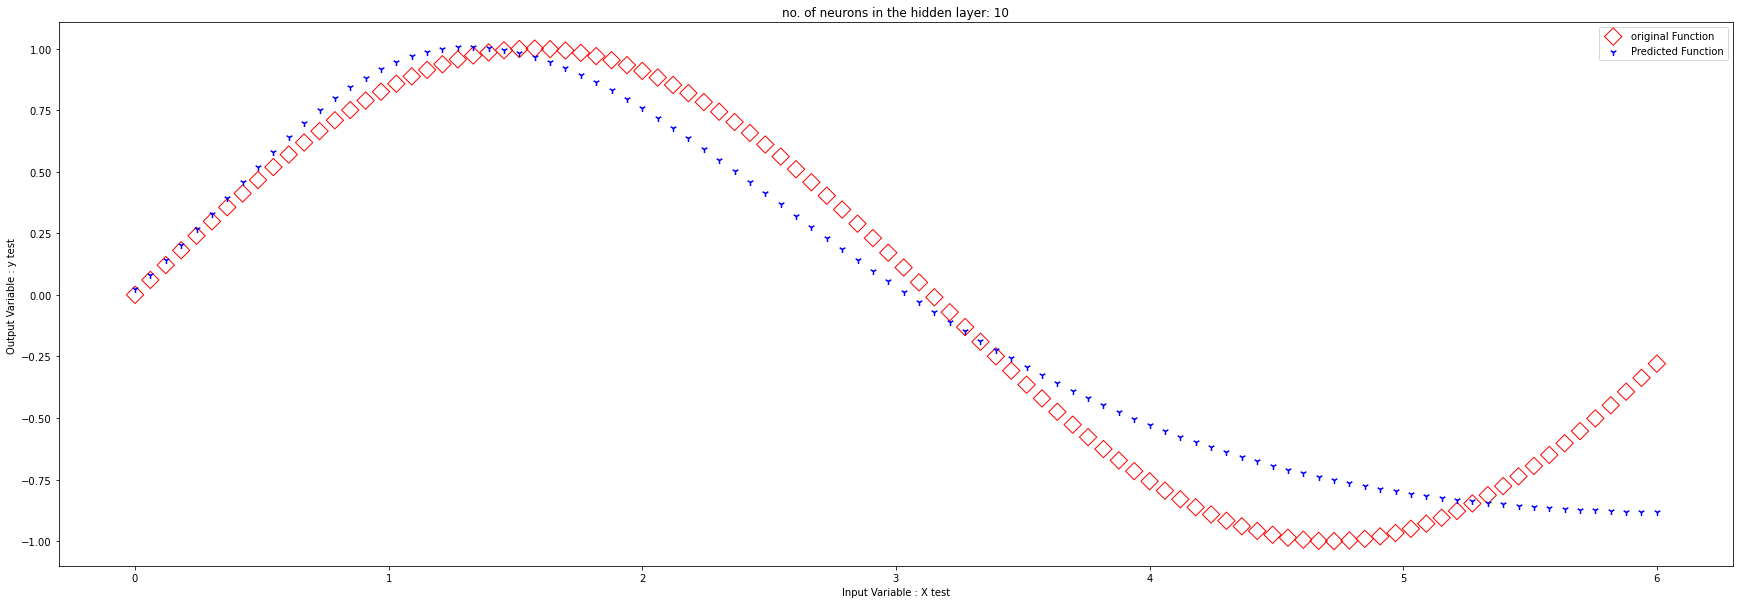

In [358]:
num_hidden_units =10
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

In [ ]:
# 15.2 sec for sigmoid -- as opposed to 13.4 seconds for RELU

loss : 0.009526542387902737
time taken is 21.7 seconds 


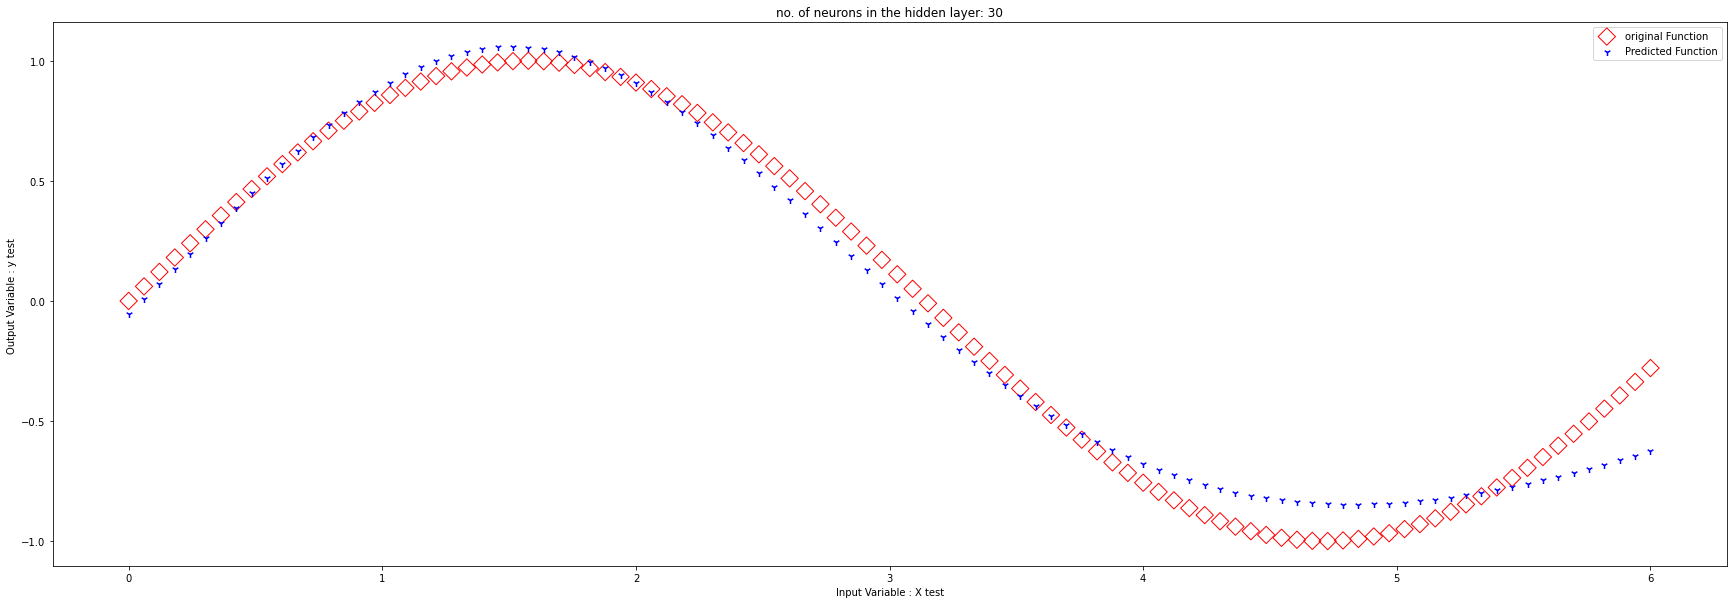

In [353]:
num_hidden_units =30
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

In [354]:
#time taken for sigmoid 30 H.u. is 21.7 seconds as opposed to 16.9 seconds for RELU 30 neuron hidden units

loss : 0.00045819999650120735
time taken is 29.4 seconds 


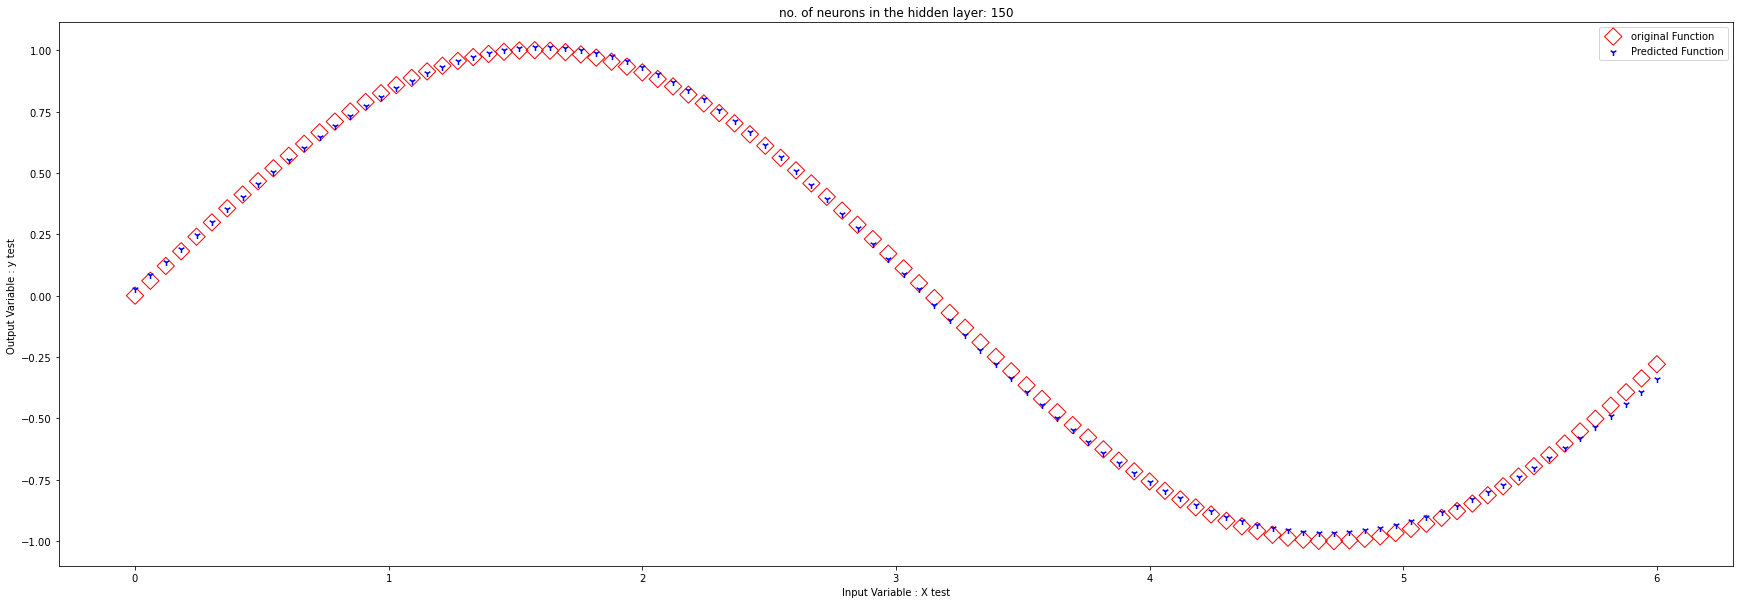

In [355]:
num_hidden_units =150
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_sine_data(model)

In [ ]:
# time taken is 29.4 seconds as opposed to 22.6 seconds in 150 hidden unit RELU

## OBSERVATION - Sigmoid NN is slower than RELU version of NN - as the former is more computationally expensive

 # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **
 
 # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **
 
  # *** ** ** *** ** ** ** *** ** *** ** *** ** ** ** *** ** *** ** *** *** *** ** ** ** ** ** ** ** *** ** **

# Q 1.e. - A different function - x^3

(1000,)
torch.Size([1000, 1])


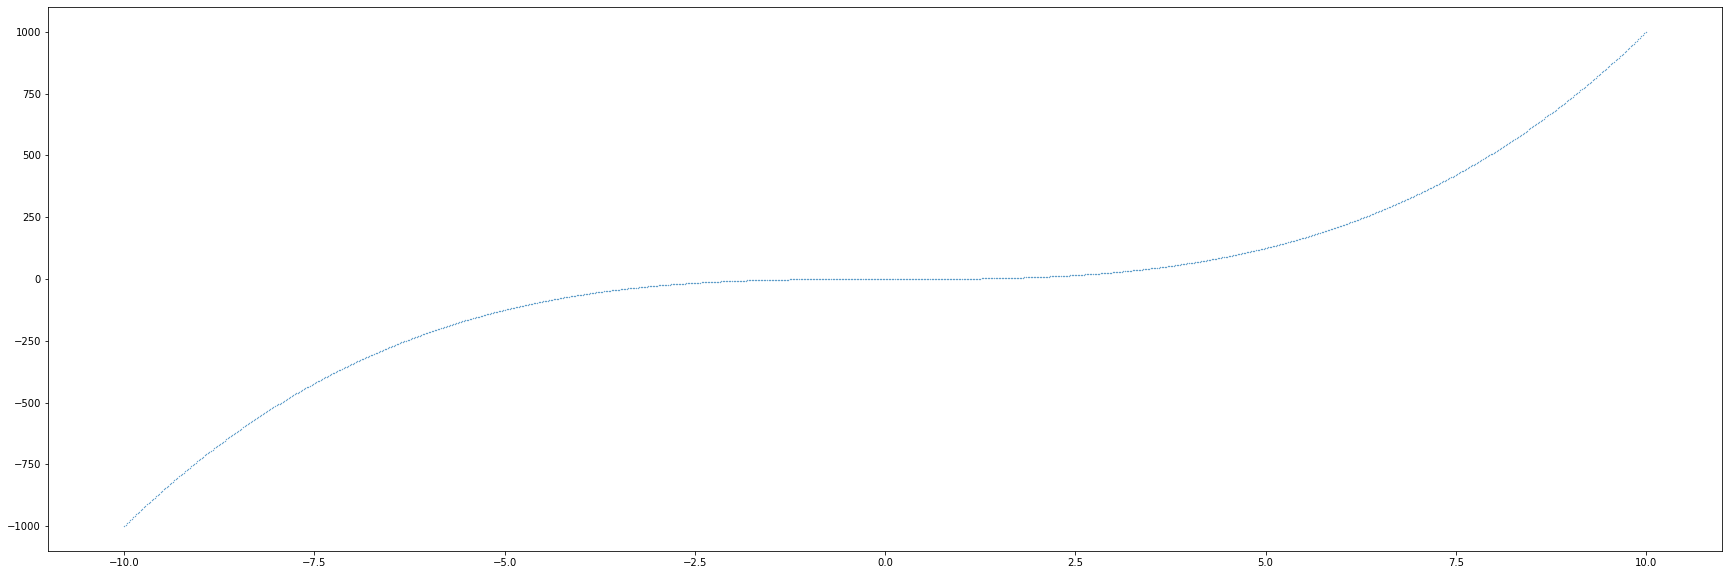

In [393]:
x = np.linspace(-10,10,1000)#-3,3
y = x**3 # broadcasting with np 
print(x.shape)
input_x = torch.tensor(x).view(-1,1) # reshape the data
print(input_x.shape)
target_y = torch.tensor(y).view(-1,1)
plt.scatter(x,y,s=0.1)
plt.show()

In [369]:
def test_cube_data( model):

    with torch.no_grad():
        x_test = np.linspace(-10,10,1000)
        test_inputs = torch.tensor(x_test).view(-1,1).float()
        y_test_original = x**3
        y_test_hat = model(test_inputs)
        y_test_hat = y_test_hat.detach().numpy()
    plt.rcParams["figure.figsize"] = (30,10)
    numsides= 4 # sqaure
    angle = 0
    plt.scatter(x_test,y_test_original,label='original Function',s=300, facecolors='none', edgecolors='r', marker= (numsides, 0, angle))
    plt.scatter(x_test,y_test_hat,label="Predicted Function",s=50, c = 'blue', marker= "1")
    plt.title(f'no. of neurons in the hidden layer: {num_hidden_units}')
    plt.ylabel('Output Variable : y test ')
    plt.xlabel('Input Variable : X test')
    plt.legend()
    plt.show()

# RELU NN with different Hidden Unit Counts

loss : 24008.501953125
time taken is 17.0 seconds 


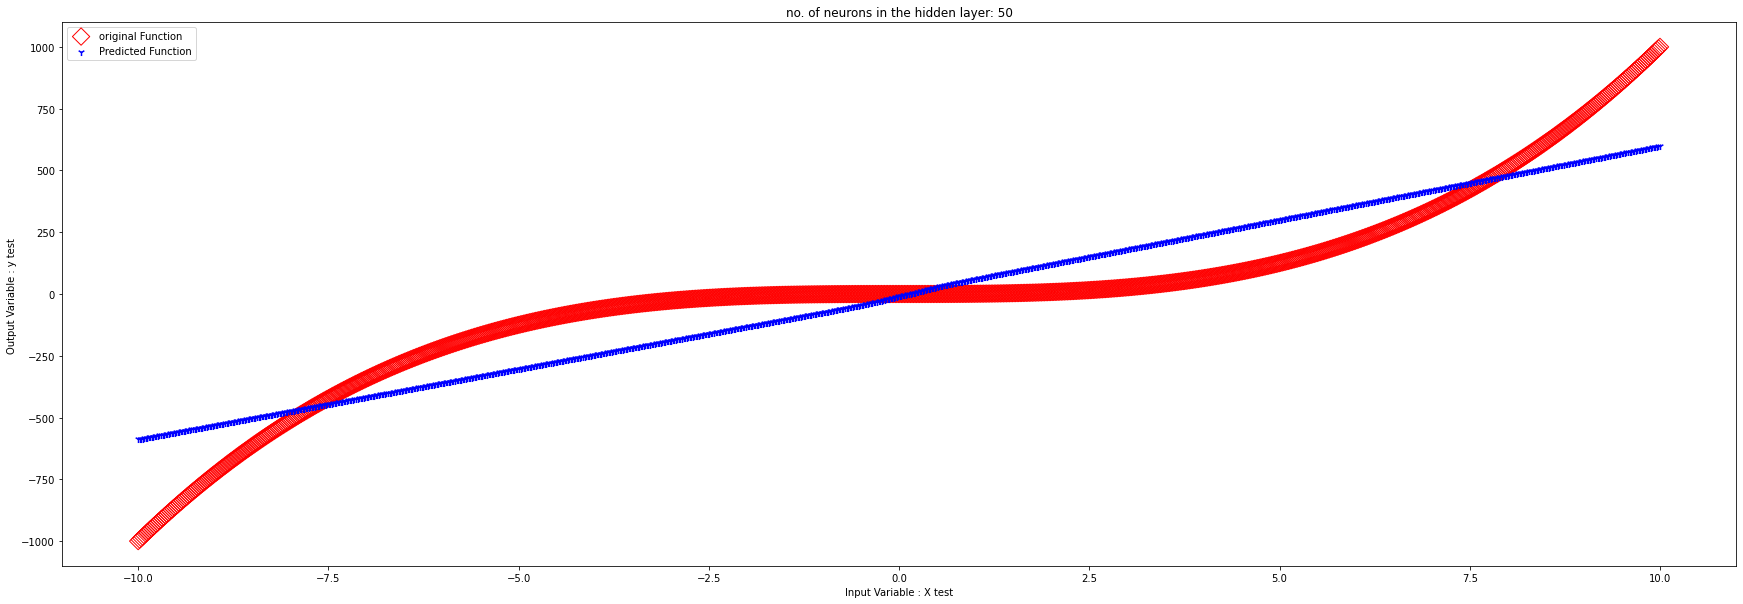

In [394]:
num_hidden_units =50
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 18000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

In [ ]:
# better approximation with higher epochs

loss : 19529.376953125
time taken is 27.8 seconds 


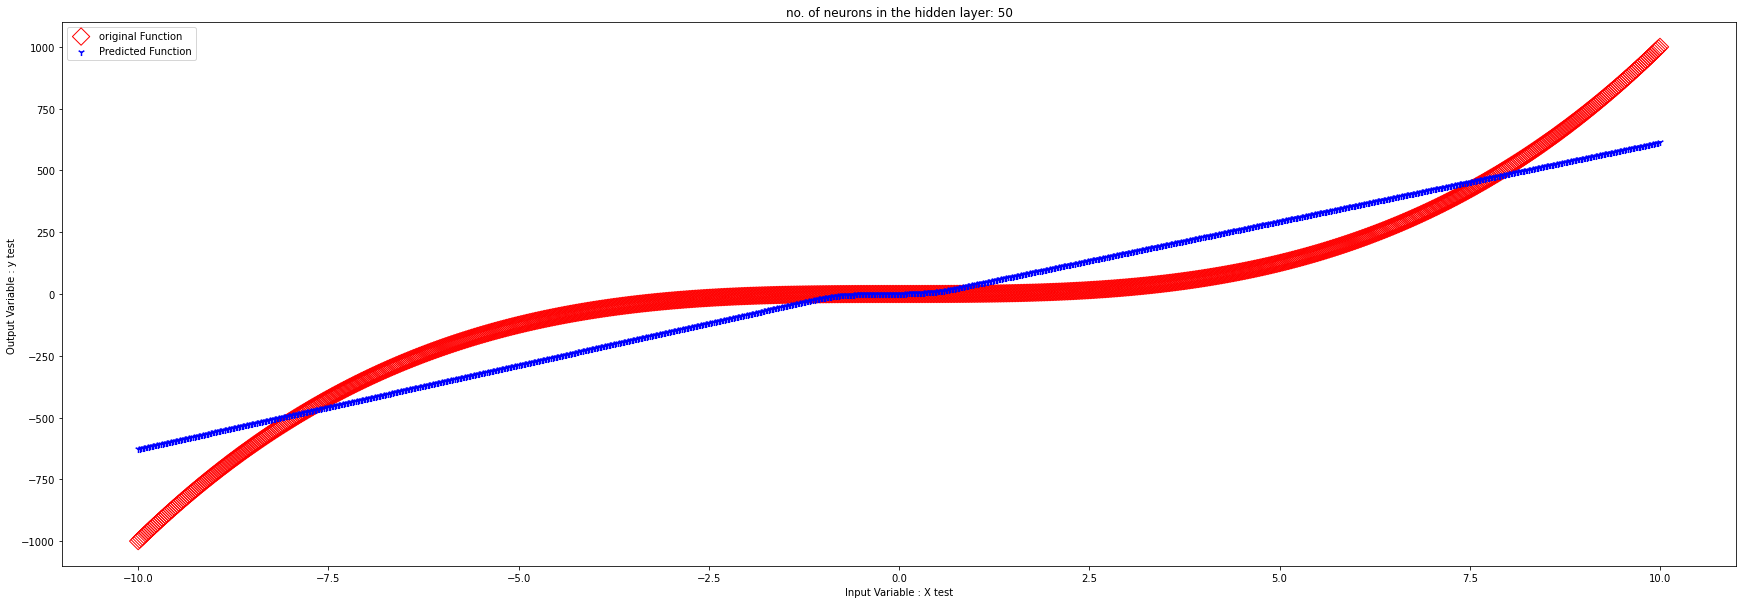

In [400]:
num_hidden_units =50
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 28000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

loss : 7679.9873046875
time taken is 33.8 seconds 


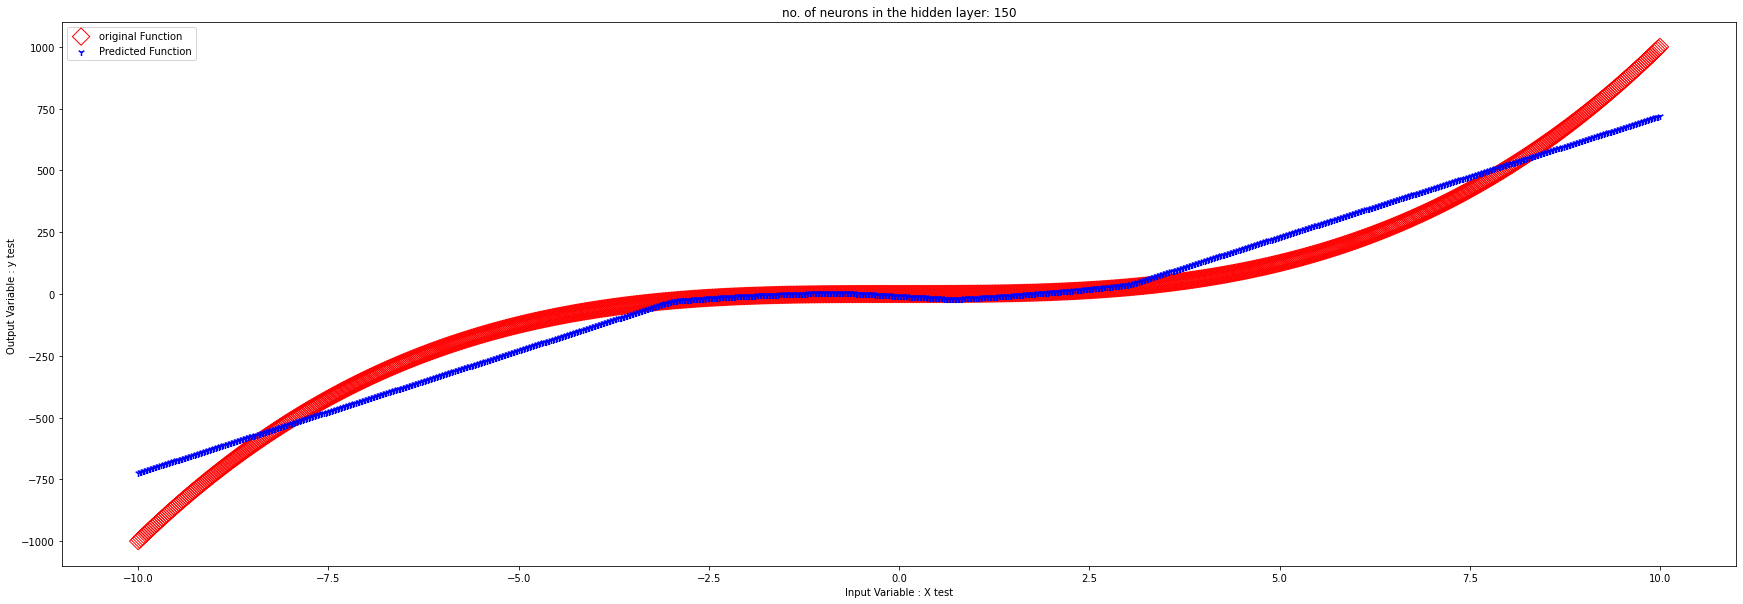

In [401]:
num_hidden_units =150
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 28000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

loss : 3200.622802734375
time taken is 49.8 seconds 


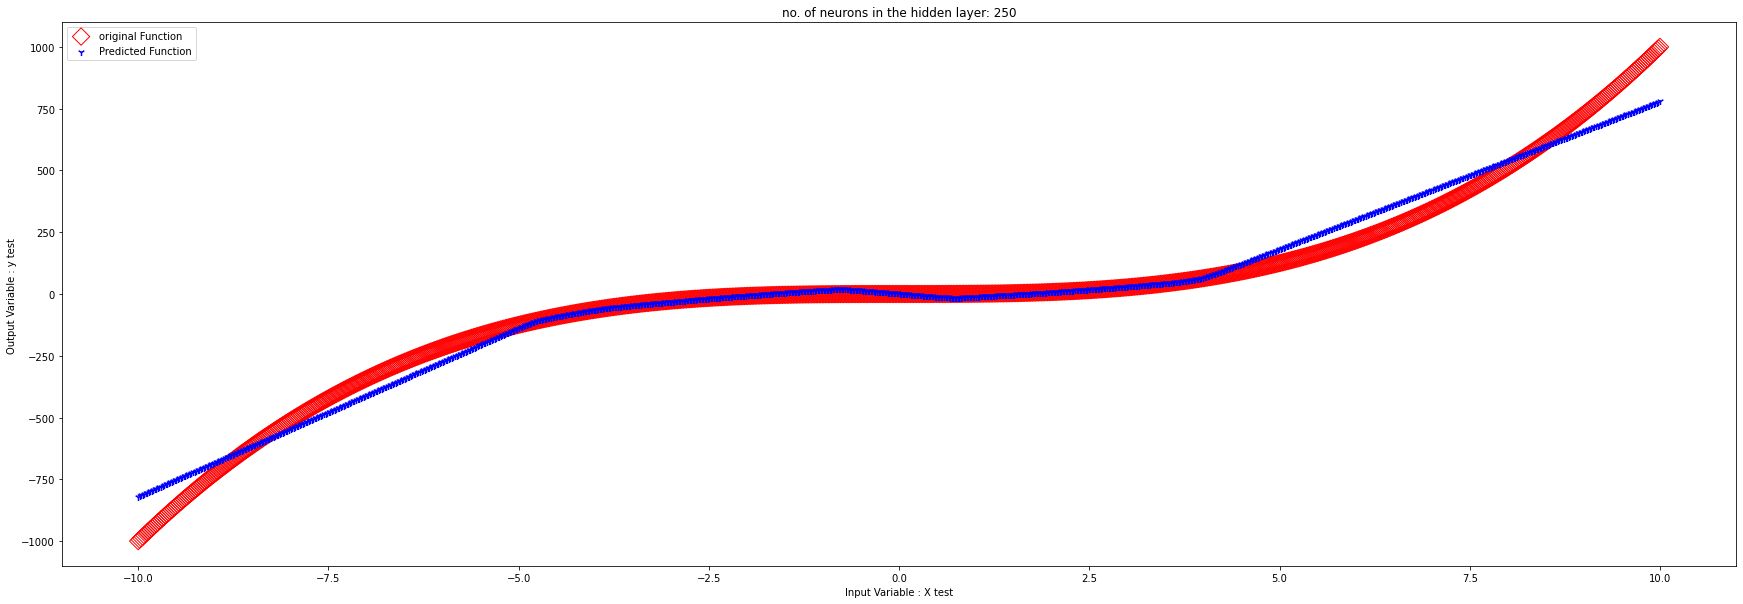

In [403]:
num_hidden_units =250
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 28000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

loss : 342.14202880859375
time taken is 130.2 seconds 


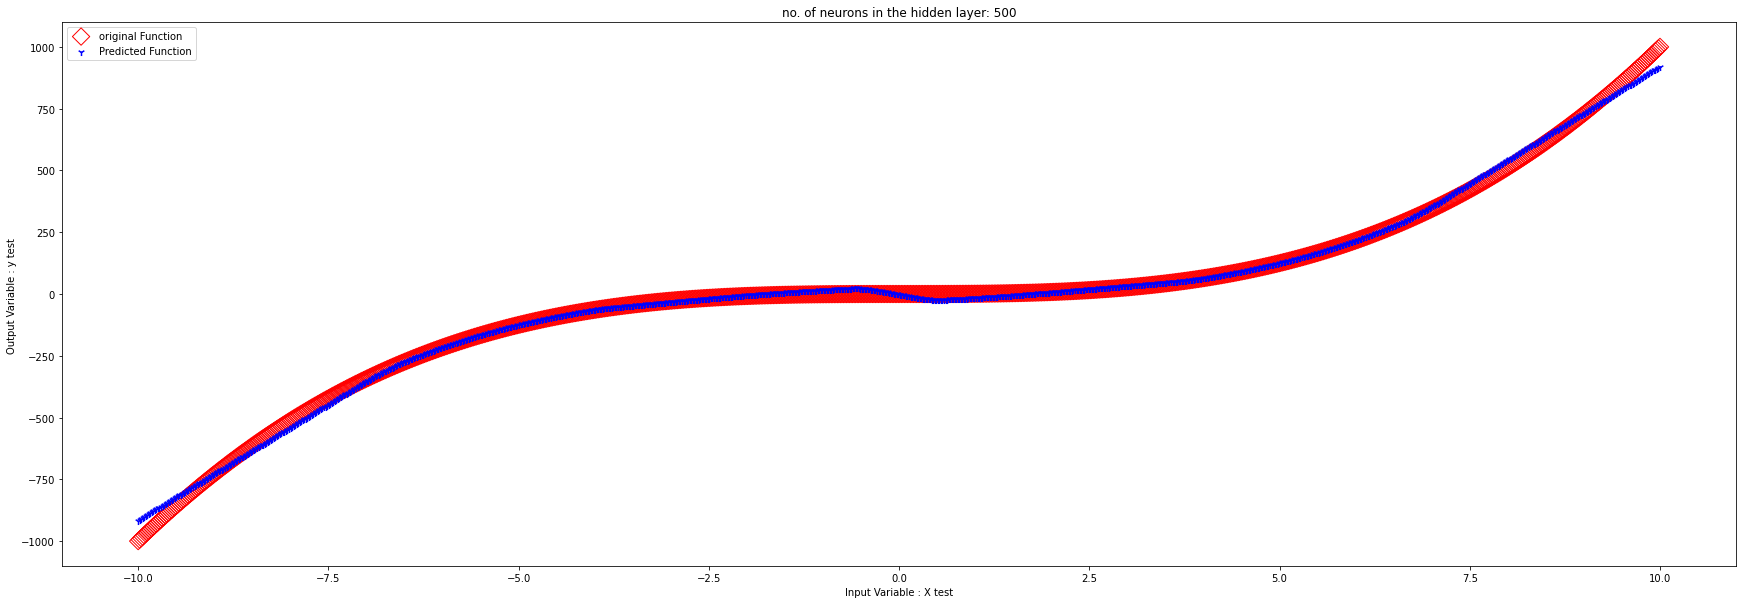

In [402]:
num_hidden_units =500
model = UnivApproxNeuralNet(num_hidden_units).to(device)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 28000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

### OBSERVATION -- x^3 requires more neurons than sin(x)
### with lower number of neurons (50 or 150) - the NN is NOT able to approximate it to a good precision
### with higher number of neurons (250 or 500) - the NN is able to approximate the Function to a good precision

# using sigmoid 

loss : 42082.11328125
time taken is 52.6 seconds 


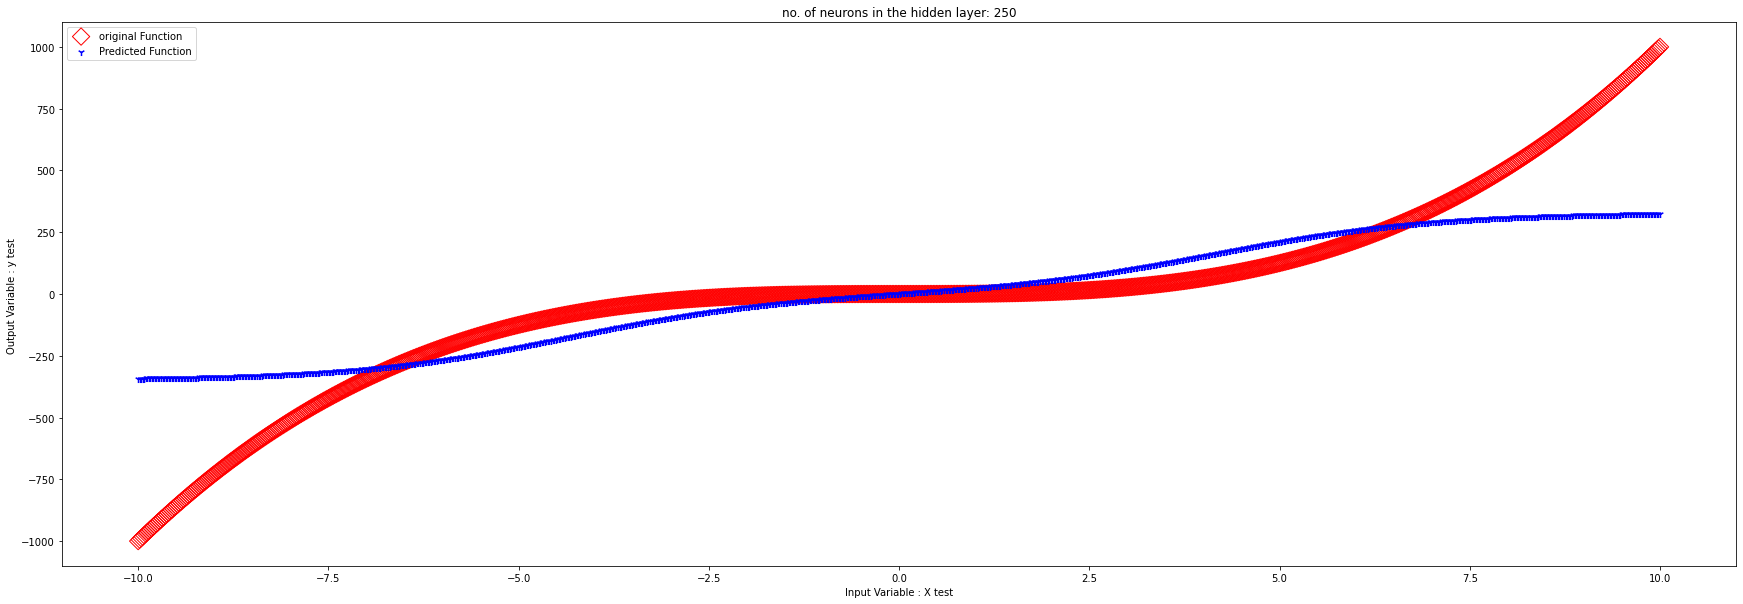

In [404]:
num_hidden_units =250
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 28000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

loss : 13076.6396484375
time taken is 103.3 seconds 


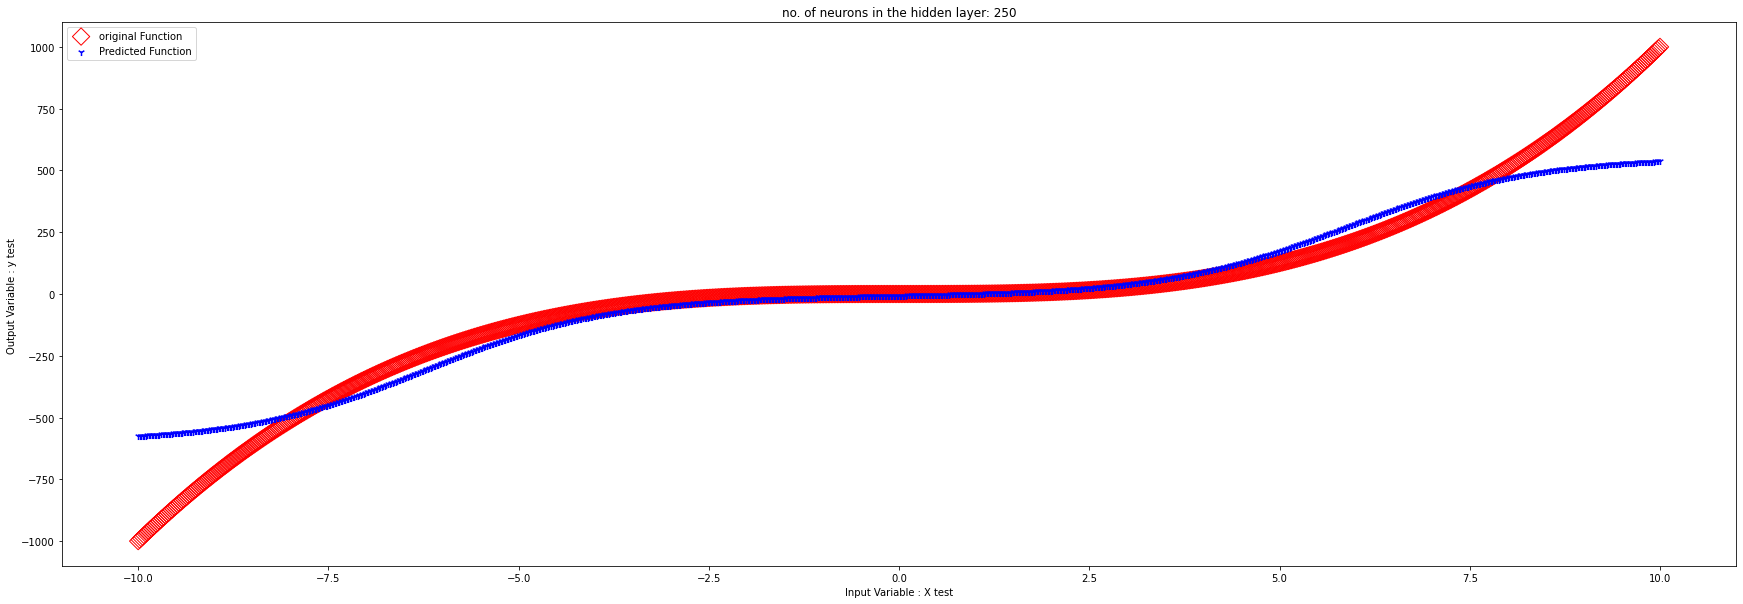

In [406]:
num_hidden_units =250
model = UnivApproxNeuralNet_sigmoid(num_hidden_units).to(device)

learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # define the optimizer
criterion = nn.MSELoss() # define the loss function

epochs = 48000
time_start = perf_counter()# measures relative time as opposed to absolute time( time.time())--best for performance compare
train_Univ_approx(optimizer, model,criterion, epochs)
time_end = perf_counter()
print('time taken is {} seconds '.format(str(np.round(time_end - time_start,1))))
test_cube_data(model)

# OBERSVATIONS convergence time for sigmoid is HIGHER : 52.6 s as opposed to  49.8 seconds for RELU - both for 28k epochs
# requires HIGHER number of epochs for the same approximation precision